# Predicting Democratic Backsliding

## Import Packages

In [1]:
# Data Wrangling
import pandas as pd
import numpy as np
import country_converter as coco
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV, and sampling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.
from imblearn.over_sampling import RandomOverSampler

# Machine learning methods 
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree # For plotting the decision tree rules
from sklearn.svm import SVC 

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline # allows for oversampling

# Model Interpretation
from sklearn.inspection import permutation_importance

## Load the democracy data and select features

The full V-Dem data set can be found here: https://www.v-dem.net/en/data/data/v-dem-dataset/ The full csv was too large to upload to github so the below code pares down the full dataset into the data being used for this model. The code is commented out so the whole notebook can be run

In [2]:
# vdem = pd.read_csv("Data/Country_Year_V-Dem_Full+others_CSV_v10/V-Dem-CY-Full+Others-v10.csv")

In [3]:
# vdem = vdem.loc[vdem['year'] >= 1960]

In [4]:
## before splitting into buckets create decades variables- leave the 2010s as the reference when doing feature selection
#vdem["60s"] = np.where((vdem.year >= 1960) & (vdem.year <1970), 1, 0) 
#vdem["70s"] = np.where((vdem.year >= 1970) & (vdem.year <1980), 1, 0) 
#vdem["80s"] = np.where((vdem.year >= 1980) & (vdem.year <1990), 1, 0)
#vdem["90s"] = np.where((vdem.year >= 1990) & (vdem.year <2000), 1, 0)
#vdem["00s"] = np.where((vdem.year >= 2000) & (vdem.year <2010), 1, 0)
#vdem["10s"] = np.where(vdem.year >= 2010, 1, 0)

In [5]:
# all the selected features
#vdem = vdem[["country_name", "year", "v2x_frassoc_thick", "v2x_suffr", "v2xel_frefair", "v2cltort", "v2clkill", "v2cltrnslw", "v2clrspct", "v2clacjust", "v2clsocgrp", "v2clacfree", "v2clrelig", "v2caassemb", "v2xcl_acjst", "v2x_clpol", "v2x_freexp", "v2x_cspart", "v2cseeorgs", "v2csreprss", "v2cscnsult", "v2csstruc_0", "v2csstruc_1", "v2csstruc_2", "v2csprtcpt", "v2csantimv", "v2csrlgrep", "v2mecenefm", "v2mecenefi", "v2mecenefibin", "v2mecrit", "v2merange", "v2meharjrn", "v2mebias", "v2pepwrses", "v2pepwrsoc", "v2peedueq", "v2pehealth", "v2peapsecon", "v2peasjsoecon", "v2peasbecon", "v2clgencl", "v2peapsgen", "v2pepwrgeo", "v2clgeocl", "v2peapsgeo", "v2peasjgeo", "v2peasbegeo", "v2clpolcl", "v2peapspol", "v2peasjpol", "v2peasbepol","v2cacamps", "v2caviol", "v2cagenmob", "v2cademmob", "v2caautmob", "v2castate", "v2catrauni", "v2capolit", "v2canonpol", "60s", "70s", "80s", "90s", "00s"]]   

In [6]:
#vdem.to_csv('Data/vdems_small.csv' ,index=False)

In [7]:
# read in V-Dem data
vdem = pd.read_csv("Data/vdems_small.csv")

In [8]:
# split into buckets
civil_liberties = vdem[["country_name", "year", "v2x_frassoc_thick", "v2x_suffr", "v2xel_frefair", "v2cltort", "v2clkill", "v2cltrnslw", "v2clrspct", "v2clacjust", "v2clsocgrp", "v2clacfree", "v2clrelig", "v2caassemb", "v2xcl_acjst", "v2x_clpol", "v2x_freexp", "60s", "70s", "80s", "90s", "00s"]]

In [9]:
civil_society = vdem[["country_name", "year", "v2x_cspart", "v2cseeorgs", "v2csreprss", "v2cscnsult", "v2csstruc_0", "v2csstruc_1", "v2csstruc_2", "v2csprtcpt", "v2csantimv", "v2csrlgrep", "60s", "70s", "80s", "90s", "00s"]]

In [10]:
media = vdem[["country_name", "year", "v2mecenefm", "v2mecenefi", "v2mecenefibin", "v2mecrit", "v2merange", "v2meharjrn", "v2mebias", "60s", "70s", "80s", "90s", "00s"]]

In [11]:
access_services = vdem[["country_name", "year", "v2pepwrses", "v2pepwrsoc", "v2peedueq", "v2pehealth", "v2peapsecon", "v2peasjsoecon", "v2peasbecon", "v2clgencl", "v2peapsgen", "v2pepwrgeo", "v2clgeocl", "v2peapsgeo", "v2peasjgeo", "v2peasbegeo", "v2clpolcl", "v2peapspol", "v2peasjpol", "v2peasbepol", "60s", "70s", "80s", "90s", "00s"]]

In [12]:
strife = vdem[["country_name", "year", "v2cacamps", "v2caviol", "v2cagenmob", "v2cademmob", "v2caautmob", "v2castate", "v2catrauni", "v2capolit", "v2canonpol", "60s", "70s", "80s", "90s", "00s"]]

In [13]:
# read in the polity data
polity_data = pd.read_csv("Data/p5v2018.csv")

In [14]:
polity_data = polity_data[["country", "year", "polity2", "durable"]]

In [15]:
# limit to observations after 1960
polity_data = polity_data.loc[polity_data['year'] >= 1960]

In [16]:
polity_data

,country,year,polity2,durable
160,Afghanistan,1960,-10.0,NaN
161,Afghanistan,1961,-10.0,NaN
162,Afghanistan,1962,-10.0,NaN
163,Afghanistan,1963,-10.0,NaN
164,Afghanistan,1964,-7.0,0.0
...,...,...,...,...
17543,Zimbabwe,2014,4.0,1.0
17544,Zimbabwe,2015,4.0,2.0
17545,Zimbabwe,2016,4.0,3.0
17546,Zimbabwe,2017,4.0,4.0


## Load the econ data 

In [17]:
# read in GDP per capita growth data
GDPPC_growth = pd.read_csv("Data/gdp_per_capita_yearly_growth- Gapminder.csv")

In [18]:
# melt so that we have country year as units of observation
GDPPC_growth = GDPPC_growth.melt(id_vars= 'country', var_name = 'year', value_name='GDPpc_growth')

In [19]:
# change year to numeric
GDPPC_growth['year'] = pd.to_numeric(GDPPC_growth['year'])

In [20]:
# keep only observations from 1960 onwards
GDPPC_growth = GDPPC_growth.loc[GDPPC_growth['year'] >= 1960]

In [21]:
# read in population data
Population = pd.read_csv("Data/Population_WB.csv", skiprows=4)

In [22]:
# Drop unwanted columns
Population.drop(columns = ["Indicator Name", "Indicator Code", "Country Code", "Unnamed: 65"], inplace=True)

In [23]:
# Melt population data
Population = Population.melt(id_vars= 'Country Name', var_name = 'year', value_name='Population')

In [24]:
# Change the year to a numeric variable
Population['year'] = pd.to_numeric(Population['year'])

## Make sure countries line up

In [25]:
# look at how many countries are in each dataset
len(vdem.country_name.unique())

182

In [26]:
len(polity_data.country.unique()) # polity has the fewest amount of countries

180

In [27]:
len(GDPPC_growth.country.unique())

194

In [28]:
len(Population["Country Name"].unique())

264

In [29]:
# standardize country names
GDPPC_names = GDPPC_growth.country.to_list()
GDPPC_names = coco.convert(GDPPC_names, to = 'name_short', not_found = None)

In [30]:
# standardize country names
Pop_names = Population["Country Name"].to_list()
Pop_names = coco.convert(Pop_names, to = 'name_short', not_found = None)

Arab World not found in regex
Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Caribbean small states not found in regex
East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
High income not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not found in regex
Low income not found in regex
Lower middle income not found in regex
Low & middl

East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
High income not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not found in regex
Low income not found in regex
Lower middle income not found in regex
Low & middle income not found in regex
Late-demographic dividend not found in regex
Middle East & North Africa not found in regex
Middle income not found in regex
Middl

Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
High income not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not found in regex
Low income not found in regex
Lower middle income not found in regex
Low & middle income not found in regex
Late-demographic dividend not found in regex
Middle East & North Africa not found in regex
Middle income not found in regex
Middle East & North Africa ( not found in regex
North America not found in regex
OECD members not found in regex
Other small states not found in regex
Pre-demographic dividen

High income not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not found in regex
Low income not found in regex
Lower middle income not found in regex
Low & middle income not found in regex
Late-demographic dividend not found in regex
Middle East & North Africa not found in regex
Middle income not found in regex
Middle East & North Africa ( not found in regex
North America not found in regex
OECD members not found in regex
Other small states not found in regex
Pre-demographic dividend not found in regex
Pacific island small states not found in regex
Post-demographic dividend not found in regex
South Asia not found in regex
Sub-Saharan Africa ( 

IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not found in regex
Low income not found in regex
Lower middle income not found in regex
Low & middle income not found in regex
Late-demographic dividend not found in regex
Middle East & North Africa not found in regex
Middle income not found in regex
Middle East & North Africa ( not found in regex
North America not found in regex
OECD members not found in regex
Other small states not found in regex
Pre-demographic dividend not found in regex
Pacific island small states not found in regex
Post-demographic dividend not found in regex
South Asia not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa not found in regex
Small states not found in regex
East Asia & Pacific (IDA & IBRD countries) not found in regex
Eur

Latin America & Caribbean not found in regex
Least developed countries: UN classification not found in regex
Low income not found in regex
Lower middle income not found in regex
Low & middle income not found in regex
Late-demographic dividend not found in regex
Middle East & North Africa not found in regex
Middle income not found in regex
Middle East & North Africa ( not found in regex
North America not found in regex
OECD members not found in regex
Other small states not found in regex
Pre-demographic dividend not found in regex
Pacific island small states not found in regex
Post-demographic dividend not found in regex
South Asia not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa not found in regex
Small states not found in regex
East Asia & Pacific (IDA & IBRD countries) not found in regex
Europe & Central Asia (IDA & IBRD countries) not found in regex
Latin America & the Caribbean (IDA & IBRD countries) not found in regex
Middle East & North Africa (IDA & 

Lower middle income not found in regex
Low & middle income not found in regex
Late-demographic dividend not found in regex
Middle East & North Africa not found in regex
Middle income not found in regex
Middle East & North Africa ( not found in regex
North America not found in regex
OECD members not found in regex
Other small states not found in regex
Pre-demographic dividend not found in regex
Pacific island small states not found in regex
Post-demographic dividend not found in regex
South Asia not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa not found in regex
Small states not found in regex
East Asia & Pacific (IDA & IBRD countries) not found in regex
Europe & Central Asia (IDA & IBRD countries) not found in regex
Latin America & the Caribbean (IDA & IBRD countries) not found in regex
Middle East & North Africa (IDA & IBRD countries) not found in regex
South Asia (IDA & IBRD) not found in regex
Sub-Saharan Africa (IDA & IBRD countries) not found in regex


Middle income not found in regex
Middle East & North Africa ( not found in regex
North America not found in regex
OECD members not found in regex
Other small states not found in regex
Pre-demographic dividend not found in regex
Pacific island small states not found in regex
Post-demographic dividend not found in regex
South Asia not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa not found in regex
Small states not found in regex
East Asia & Pacific (IDA & IBRD countries) not found in regex
Europe & Central Asia (IDA & IBRD countries) not found in regex
Latin America & the Caribbean (IDA & IBRD countries) not found in regex
Middle East & North Africa (IDA & IBRD countries) not found in regex
South Asia (IDA & IBRD) not found in regex
Sub-Saharan Africa (IDA & IBRD countries) not found in regex
Upper middle income not found in regex
World not found in regex
Arab World not found in regex
Central Europe and the Baltics not found in regex
Channel Islands not found

Other small states not found in regex
Pre-demographic dividend not found in regex
Pacific island small states not found in regex
Post-demographic dividend not found in regex
South Asia not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa not found in regex
Small states not found in regex
East Asia & Pacific (IDA & IBRD countries) not found in regex
Europe & Central Asia (IDA & IBRD countries) not found in regex
Latin America & the Caribbean (IDA & IBRD countries) not found in regex
Middle East & North Africa (IDA & IBRD countries) not found in regex
South Asia (IDA & IBRD) not found in regex
Sub-Saharan Africa (IDA & IBRD countries) not found in regex
Upper middle income not found in regex
World not found in regex
Arab World not found in regex
Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Caribbean small states not found in regex
East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East As

South Asia not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa not found in regex
Small states not found in regex
East Asia & Pacific (IDA & IBRD countries) not found in regex
Europe & Central Asia (IDA & IBRD countries) not found in regex
Latin America & the Caribbean (IDA & IBRD countries) not found in regex
Middle East & North Africa (IDA & IBRD countries) not found in regex
South Asia (IDA & IBRD) not found in regex
Sub-Saharan Africa (IDA & IBRD countries) not found in regex
Upper middle income not found in regex
World not found in regex
Arab World not found in regex
Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Caribbean small states not found in regex
East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in r

East Asia & Pacific (IDA & IBRD countries) not found in regex
Europe & Central Asia (IDA & IBRD countries) not found in regex
Latin America & the Caribbean (IDA & IBRD countries) not found in regex
Middle East & North Africa (IDA & IBRD countries) not found in regex
South Asia (IDA & IBRD) not found in regex
Sub-Saharan Africa (IDA & IBRD countries) not found in regex
Upper middle income not found in regex
World not found in regex
Arab World not found in regex
Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Caribbean small states not found in regex
East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
High income not found in regex
Heavily indebted poor countries (HIPC) not f

Middle East & North Africa (IDA & IBRD countries) not found in regex
South Asia (IDA & IBRD) not found in regex
Sub-Saharan Africa (IDA & IBRD countries) not found in regex
Upper middle income not found in regex
World not found in regex
Arab World not found in regex
Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Caribbean small states not found in regex
East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
High income not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Not classified not found in regex

Upper middle income not found in regex
World not found in regex
Arab World not found in regex
Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Caribbean small states not found in regex
East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
High income not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not found in regex
Low income not f

Channel Islands not found in regex
Caribbean small states not found in regex
East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
High income not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not found in regex
Low income not found in regex
Lower middle income not found in regex
Low & middle income not found in regex
Late-demographic dividend not found in regex
Middle 

East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
High income not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not found in regex
Low income not found in regex
Lower middle income not found in regex
Low & middle income not found in regex
Late-demographic dividend not found in regex
Middle East & North Africa not found in regex
Middle income not found in regex
Middle East & North Africa ( not found in regex
North America not found in regex
OECD member

In [31]:
# standardize country names
GDPPC_growth.country = GDPPC_names
Population["Country Name"] = Pop_names

In [32]:
# standardize country names with country-converter 
vdem_names = civil_liberties.country_name.to_list()
vdem_names = coco.convert(vdem_names, to = 'name_short', not_found = None)

Republic of Vietnam not found in regex
Republic of Vietnam not found in regex
Republic of Vietnam not found in regex
Republic of Vietnam not found in regex
Republic of Vietnam not found in regex
Republic of Vietnam not found in regex
Republic of Vietnam not found in regex
Republic of Vietnam not found in regex
Republic of Vietnam not found in regex
Republic of Vietnam not found in regex
Republic of Vietnam not found in regex
Republic of Vietnam not found in regex
Republic of Vietnam not found in regex
Republic of Vietnam not found in regex
Republic of Vietnam not found in regex
Republic of Vietnam not found in regex
German Democratic Republic not found in regex
German Democratic Republic not found in regex
German Democratic Republic not found in regex
German Democratic Republic not found in regex
German Democratic Republic not found in regex
German Democratic Republic not found in regex
German Democratic Republic not found in regex
German Democratic Republic not found in regex
German D

In [33]:
# standardize country names
polity_names = polity_data.country.tolist()
polity_names = coco.convert(polity_names, to = 'name_short')

Vietnam North not found in regex
Vietnam North not found in regex
Vietnam North not found in regex
Vietnam North not found in regex
Vietnam North not found in regex
Vietnam North not found in regex
Vietnam North not found in regex
Vietnam North not found in regex
Vietnam North not found in regex
Vietnam North not found in regex
Vietnam North not found in regex
Vietnam North not found in regex
Vietnam North not found in regex
Vietnam North not found in regex
Vietnam North not found in regex
Vietnam North not found in regex
Vietnam North not found in regex
Germany East not found in regex
Germany East not found in regex
Germany East not found in regex
Germany East not found in regex
Germany East not found in regex
Germany East not found in regex
Germany East not found in regex
Germany East not found in regex
Germany East not found in regex
Germany East not found in regex
Germany East not found in regex
Germany East not found in regex
Germany East not found in regex
Germany East not found 

In [34]:
# overwrite country names with the standardized names 
polity_data["country"] = polity_names
access_services["country_name"] = vdem_names
civil_liberties["country_name"] = vdem_names
civil_society["country_name"] = vdem_names
media["country_name"] = vdem_names
strife["country_name"] = vdem_names
vdem["country_name"] = vdem_names

In [35]:
polity_names = pd.Series(polity_names)
vdem_names = pd.Series(vdem_names)

In [36]:
# find the overlapping countries
intersection = pd.Series(np.intersect1d(polity_names, vdem_names))

In [37]:
# keep only countries with overlap
polity_data = polity_data[polity_data["country"].isin(intersection)]
access_services = access_services[access_services["country_name"].isin(intersection)]
civil_liberties = civil_liberties[civil_liberties["country_name"].isin(intersection)]
civil_society = civil_society[civil_society["country_name"].isin(intersection)]
media = media[media["country_name"].isin(intersection)]
strife = strife[strife["country_name"].isin(intersection)]
vdem = vdem[vdem["country_name"].isin(intersection)]

In [38]:
# number of countries
vdem.country_name.nunique()

166

## Wrangle institution data

In [39]:
### Model stops working when I do this

# Create dummies for country fixed effects
#fixed_effect = pd.get_dummies(vdem.country_name, drop_first = True)

# Add to buckets
#access_services = pd.concat([access_services, fixed_effect], axis = 1)
#civil_liberties = pd.concat([civil_liberties, fixed_effect], axis = 1)
#civil_society = pd.concat([civil_society, fixed_effect], axis = 1)
#media = pd.concat([media, fixed_effect], axis = 1)
#strife = pd.concat([strife, fixed_effect], axis = 1)
#vdem = pd.concat([vdem, fixed_effect], axis = 1)

In [40]:
# Set country and year as index for X variables
access_services.set_index(["country_name", "year"], inplace=True)
civil_liberties.set_index(["country_name", "year"], inplace=True)
civil_society.set_index(["country_name", "year"], inplace=True)
media.set_index(["country_name", "year"], inplace=True)
strife.set_index(["country_name", "year"], inplace=True)
vdem.set_index(["country_name", "year"], inplace=True)

In [41]:
# impute nas based on previous 
strife = strife.groupby("country_name").fillna(method='ffill')
media = media.groupby("country_name").fillna(method='ffill')
civil_society = civil_society.groupby("country_name").fillna(method='ffill')
civil_liberties = civil_liberties.groupby("country_name").fillna(method='ffill')
access_services =access_services.groupby("country_name").fillna(method='ffill')
vdem = vdem.groupby("country_name").fillna(method='ffill')

In [42]:
# select which columns to lag- everything but the decades
mask_strife = ~(strife.columns.isin(['60s','70s', '80s', '90s', '00s']))
mask_media = ~(media.columns.isin(['60s','70s', '80s', '90s', '00s']))
mask_civil_society = ~(civil_society.columns.isin(['60s','70s', '80s', '90s', '00s']))
mask_civil_liberties = ~(civil_liberties.columns.isin(['60s','70s', '80s', '90s', '00s']))
mask_access_services = ~(access_services.columns.isin(['60s','70s', '80s', '90s', '00s']))
mask_vdem = ~(vdem.columns.isin(['60s','70s', '80s', '90s', '00s']))
cols_to_shift_strife = strife.columns[mask_strife]
cols_to_shift_media = media.columns[mask_media]
cols_to_shift_civil_society = civil_society.columns[mask_civil_society]
cols_to_shift_civil_liberties = civil_liberties.columns[mask_civil_liberties]
cols_to_shift_access_services = access_services.columns[mask_access_services]
cols_to_shift_vdem = vdem.columns[mask_vdem]

In [43]:
# lag variables- previous year
# strife = strife.groupby("country_name").shift()
# media = media.groupby("country_name").shift()
# civil_society = civil_society.groupby("country_name").shift()
# civil_liberties = civil_liberties.groupby("country_name").shift()
# access_services =access_services.groupby("country_name").shift()
# vdem = vdem.groupby("country_name").shift()

# lag by 2
#strife = strife.groupby("country_name").shift(2)
#media = media.groupby("country_name").shift(2)
#civil_society = civil_society.groupby("country_name").shift(2)
#civil_liberties = civil_liberties.groupby("country_name").shift(2)
#access_services =access_services.groupby("country_name").shift(2)
#vdem = vdem.groupby("country_name").shift(2)

# lag by 5
strife[cols_to_shift_strife] = strife[cols_to_shift_strife].groupby("country_name").shift(5)
media[cols_to_shift_media] = media[cols_to_shift_media].groupby("country_name").shift(5)
civil_society[cols_to_shift_civil_society] = civil_society[cols_to_shift_civil_society].groupby("country_name").shift(5)
civil_liberties[cols_to_shift_civil_liberties] = civil_liberties[cols_to_shift_civil_liberties].groupby("country_name").shift(5)
access_services[cols_to_shift_access_services] =access_services[cols_to_shift_access_services].groupby("country_name").shift(5)
vdem[cols_to_shift_vdem] = vdem[cols_to_shift_vdem].groupby("country_name").shift(5)

In [44]:
# for the y let's drop durable
polity_data.drop(columns = "durable", inplace=True)

In [45]:
# Create variable to show change in polity score
shifted_polity = polity_data.groupby("country").apply(lambda x: x - x.shift(1))

In [46]:
polity_data["change in polity"] = shifted_polity.polity2

In [47]:
# create binary variable for presence of backsliding
polity_data["backsliding"] = np.where(polity_data["change in polity"] >= 0, 0, 1) 

In [48]:
# set country year index for Y
polity_data.set_index(["country", "year"], inplace=True)

In [49]:
polity_data.drop(columns = ["polity2", "change in polity"], inplace=True)

In [50]:
# Merge Data
access_services = polity_data.merge(access_services, how = "inner", left_index = True, right_on = ['country_name', 'year'])
civil_liberties = polity_data.merge(civil_liberties, how = "inner", left_index = True, right_on = ['country_name', 'year'])
civil_society = polity_data.merge(civil_society, how = "inner", left_index = True, right_on = ['country_name', 'year'])
media = polity_data.merge(media, how = "inner", left_index = True, right_on = ['country_name', 'year'])
strife = polity_data.merge(strife, how = "inner", left_index = True, right_on = ['country_name', 'year'])
vdem = polity_data.merge(vdem, how = "inner", left_index = True, right_on = ['country_name', 'year'])

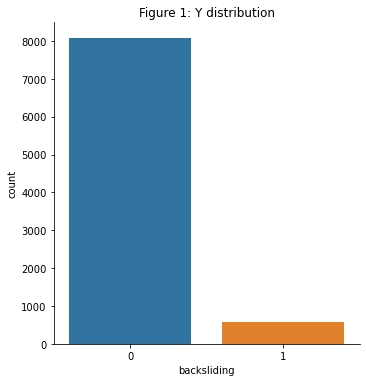

In [51]:
# plot the distribution of the Y variable
sns.catplot(x = "backsliding", kind="count", data=vdem)
plt.title("Figure 1: Y distribution")
plt.savefig("Figures/y_distribution", bbox_inches='tight')

In [52]:
# count
polity_data.backsliding.value_counts()

0    8013
1     562
Name: backsliding, dtype: int64

## Wrangle Economic Data

In [53]:
# set index to country and year
GDPPC_growth.set_index(["country", "year"], inplace= True)
Population.set_index(["Country Name", "year"], inplace= True)

In [54]:
# Merge all the econ data
Econ_merge = GDPPC_growth.merge(Population, how = "inner", left_index=True, right_on=["Country Name", "year"])

In [55]:
 # Lag Data
 # Econ_merge = Econ_merge.groupby("Country Name").shift()

 # Lag by 2
# Econ_merge = Econ_merge.groupby("Country Name").shift(2)
 
 #Lag by 5
Econ_merge = Econ_merge.groupby("Country Name").shift(5)

In [56]:
strife

backsliding  v2cacamps  v2caviol  v2cagenmob  v2cademmob  \
country_name year                                                             
Afghanistan  1960            1        NaN       NaN         NaN         NaN   
             1961            0        NaN       NaN         NaN         NaN   
             1962            0        NaN       NaN         NaN         NaN   
             1963            0        NaN       NaN         NaN         NaN   
             1964            0        NaN       NaN         NaN         NaN   
...                        ...        ...       ...         ...         ...   
Zimbabwe     2014            0      2.963     2.041       2.333       1.912   
             2015            0      2.088     1.780       1.723       1.438   
             2016            0      2.124     1.780       2.116       1.438   
             2017            0      2.124     1.780       2.116       1.438   
             2018            0      2.124     1.780       2.116       1.438   

                   v2caautmob  v2castate  v2catrauni  v2capolit  v2canonpol  \
country_name year                                                             
Afghanistan  1960         NaN        NaN         NaN        NaN         NaN   
             1961         NaN        NaN         NaN        NaN         NaN   
             1962         NaN        NaN         NaN        NaN         NaN   
             1963         NaN        NaN         NaN        NaN         NaN   
             1964         NaN        NaN         NaN        NaN         NaN   
...                       ...        ...         ...        ...         ...   
Zimbabwe     2014       1.973      2.459       1.588      2.696       2.446   
             2015       2.264      2.105       1.412      2.696       2.446   
             2016       2.264      2.105       1.205      2.696       2.234   
             2017       2.264      2.105       0.940      2.696       2.234   
             2018       3.047      2.126       0.940      2.696       2.234   

                   60s  70s  80s  90s  00s  
country_name year                           
Afghanistan  1960    1    0    0    0    0  
             1961    1    0    0    0    0  
             1962    1    0    0    0    0  
             1963    1    0    0    0    0  
             1964    1    0    0    0    0  
...                ...  ...  ...  ...  ...  
Zimbabwe     2014    0    0    0    0    0  
             2015    0    0    0    0    0  
             2016    0    0    0    0    0  
             2017    0    0    0    0    0  
             2018    0    0    0    0    0  

[8658 rows x 15 columns]

In [57]:
Econ_merge

,,GDPpc_growth,Population
Country Name,year,,
Afghanistan,1960,NaN,NaN
Albania,1960,NaN,NaN
Algeria,1960,NaN,NaN
Andorra,1960,NaN,NaN
Angola,1960,NaN,NaN
...,...,...,...
Venezuela,2019,-2.04,30045134.0
Vietnam,2019,4.51,91714595.0
Yemen,2019,2.02,25823485.0


In [58]:
# Merge with Buckets
strife = Econ_merge.merge(strife, how = "inner", left_index = True, right_on = ["country_name", "year"])
civil_liberties = Econ_merge.merge(civil_liberties, how = "inner", left_index = True, right_on = ['country_name', 'year'])
civil_society = Econ_merge.merge(civil_society, how = "inner", left_index = True, right_on = ['country_name', 'year'])
media = Econ_merge.merge(media, how = "inner", left_index = True, right_on = ['country_name', 'year'])
vdem = Econ_merge.merge(vdem, how = "inner", left_index = True, right_on = ['country_name', 'year'])
access_services = Econ_merge.merge(access_services, how = "inner", left_index = True, right_on = ['country_name', 'year'])

In [59]:
strife

,,GDPpc_growth,Population,backsliding,v2cacamps,v2caviol,v2cagenmob,v2cademmob,v2caautmob,v2castate,v2catrauni,v2capolit,v2canonpol,60s,70s,80s,90s,00s
country_name,year,,,,,,,,,,,,,,,,,
Afghanistan,1960,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
Albania,1960,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
Argentina,1960,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
Australia,1960,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
Austria,1960,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,2018,-0.577,29783571.0,0,1.978,2.287,2.394,2.343,2.481,1.889,0.082,1.719,1.115,0,0,0,0,0
Vietnam,2018,4.330,90753472.0,0,-1.151,-1.590,1.193,-1.714,0.168,2.175,-1.683,-0.110,1.612,0,0,0,0,0
Yemen,2018,1.350,25147109.0,0,0.154,0.379,0.690,0.972,1.240,1.469,1.587,0.981,0.142,0,0,0,0,0


## Modeling

## Split the data for strife

In [60]:
# split strife
y = strife.backsliding
X = strife.drop(columns="backsliding")
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=202011)

## Explore the training data

<AxesSubplot:>

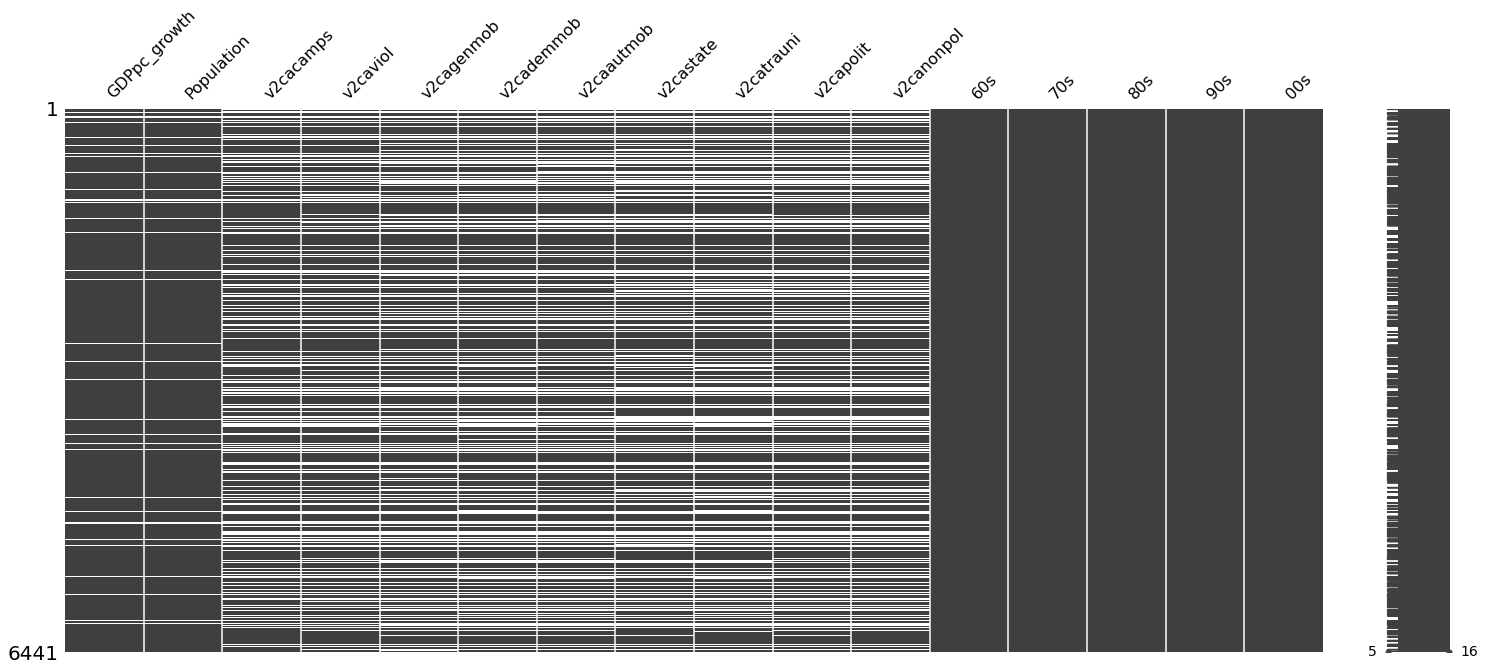

In [61]:
miss.matrix(train_X)

In [62]:
train_X

,,GDPpc_growth,Population,v2cacamps,v2caviol,v2cagenmob,v2cademmob,v2caautmob,v2castate,v2catrauni,v2capolit,v2canonpol,60s,70s,80s,90s,00s
country_name,year,,,,,,,,,,,,,,,,
Kuwait,1973,-0.485,632899.0,-2.780,0.065,1.132,-0.147,-1.565,-0.343,-0.142,0.530,0.377,0,1,0,0,0
Russia,2007,5.300,145306497.0,-1.218,-0.566,-0.299,0.254,-1.838,-1.625,0.885,0.015,-0.129,0,0,0,0,1
Georgia,2008,12.300,3951736.0,1.386,-0.214,3.273,3.402,-0.144,-1.426,-0.410,-0.650,-0.839,0,0,0,0,1
Mongolia,1989,3.060,1871090.0,-1.962,0.091,-2.046,-2.356,1.194,2.689,1.801,0.019,0.593,0,0,1,0,0
Nicaragua,1988,2.330,3549711.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cambodia,1980,-0.498,7524447.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0
France,2013,-0.629,64374984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
Luxembourg,1967,0.526,320750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0


In [63]:
train_X.dropna(inplace=True)

In [64]:
train_X.describe()

,GDPpc_growth,Population,v2cacamps,v2caviol,v2cagenmob,v2cademmob,v2caautmob,v2castate,v2catrauni,v2capolit,v2canonpol,60s,70s,80s,90s,00s
count,3973.000000,3.973000e+03,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000
mean,1.899626,3.789178e+07,-0.258892,-0.277410,-0.278287,-0.410417,-0.379835,-0.090354,0.448213,0.309984,0.476940,0.073496,0.157312,0.170904,0.186509,0.207652
std,6.716948,1.332021e+08,1.325477,1.381953,1.271574,1.282241,1.289740,1.438333,1.392021,1.265929,1.142628,0.260982,0.364140,0.376472,0.389566,0.405677
min,-61.600000,1.905680e+05,-3.527000,-3.065000,-3.200000,-2.607000,-2.172000,-2.979000,-2.802000,-2.548000,-2.894000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.315000,3.265165e+06,-1.358000,-1.390000,-1.207000,-1.438000,-1.458000,-1.262000,-0.466000,-0.546000,-0.231000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.180000,8.251540e+06,-0.198000,-0.351000,-0.335000,-0.613000,-0.665000,-0.199000,0.698000,0.370000,0.593000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.580000,2.556072e+07,0.713000,0.668000,0.639000,0.549000,0.512000,1.121000,1.369000,1.171000,1.303000,0.000000,0.000000,0.000000,0.000000,0.000000
max,142.000000,1.357380e+09,2.998000,3.419000,3.467000,3.691000,3.809000,3.584000,3.722000,3.448000,3.641000,1.000000,1.000000,1.000000,1.000000,1.000000


## Make edits to full data

In [65]:
strife.dropna(inplace = True)

# Model

In [66]:
# split strife again
y = strife["backsliding"]
X = strife.drop(columns="backsliding")
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=202011)

In [67]:
# Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=1234)

# Set preprocess equal to Min Max Scaler to keep our variable distributions
preprocess = pp.MinMaxScaler()

# set sampling to SMOTE
SMOTE = RandomOverSampler(random_state=12)

In [68]:
# Build the modeling pipeline
pipe = Pipeline(steps=[('pre_process', preprocess),('sample', SMOTE), ('model',None)])

search_space = [
    
    # NaiveBayes
    {'model': [NB()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[5,10,25,50]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DT()],
     'model__max_depth':[2,3,4]},
    
    # Random forest with the N Estimators, max depth, and max features tuning param
    {'model' : [RF()],
    'model__max_depth':[7,8,9],
    'model__n_estimators':[500,1000,1500],
    'model__max_features': [5,10,15]},
    
    # SVC with 
    {'model' : [SVC()],
    'model__C' : [0.1, 1, 10, 100, 1000],
    'model__kernel' : ['linear', 'poly', 'rbf']},
    
]

# Grid Search to find the best parameters. The metric used for evaluation is balanced accuracy
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='balanced_accuracy',
                      n_jobs=4)

# fit the data with the model
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('sample',
                                        RandomOverSampler(random_state=12)),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [GaussianNB()]},
                         {'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [5, 10, 25, 50]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [2, 3, 4]},
                         {'model': [RandomForestClassifier()],
                          'model__max_depth': [7, 8, 9],
                          'model__max_features': [5, 10, 15],
                          'model__n_estimators': [500, 1000, 1500]},
                         {'model': [SVC(C=1)],
                          'model__C': [0.1, 1, 10, 100

In [69]:
#this is our out of sample balanced accuracy
search.best_score_ 

0.6650286047404406

In [70]:
# what model performs the best
search.best_params_

{'model': SVC(C=1), 'model__C': 1, 'model__kernel': 'rbf'}

In [71]:
# now what happens if we try on the test data
best_mod = search.best_estimator_

In [72]:
pred_y = best_mod.predict(test_X)

In [73]:
# create a list to keep all the recall scores
recall_score_list = []

In [74]:
# create a list to keep all the balanced accuracy scores
balanced_accuracy_score_list = []

In [75]:
# calculate balanced accuracy and save to the list
score = m.balanced_accuracy_score(test_y, pred_y)
print(score)
balanced_accuracy_score_list.append({'strife':score})

0.6927536231884058


In [76]:
# calculate recall score and sacve to the list
recall = m.recall_score(test_y, pred_y)
recall_score_list.append({'strife':recall})

In [77]:
# save the confusion matrix to a list
confusion_list = []

In [78]:
confusion = m.confusion_matrix(test_y, pred_y)
print(confusion)
confusion_list.append(confusion)

[[891 374]
 [ 22  47]]


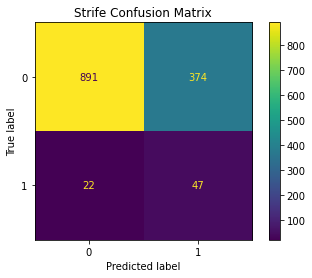

In [79]:
# plot the confusion matrix
m.plot_confusion_matrix(best_mod, test_X, test_y)
plt.title("Strife Confusion Matrix")
plt.savefig("Figures/Strife_Confusion_matrix")

## Split the data for Access to Services

In [80]:
# split 
y = access_services.backsliding
X = access_services.drop(columns="backsliding")
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=202011)

## Explore training data

<AxesSubplot:>

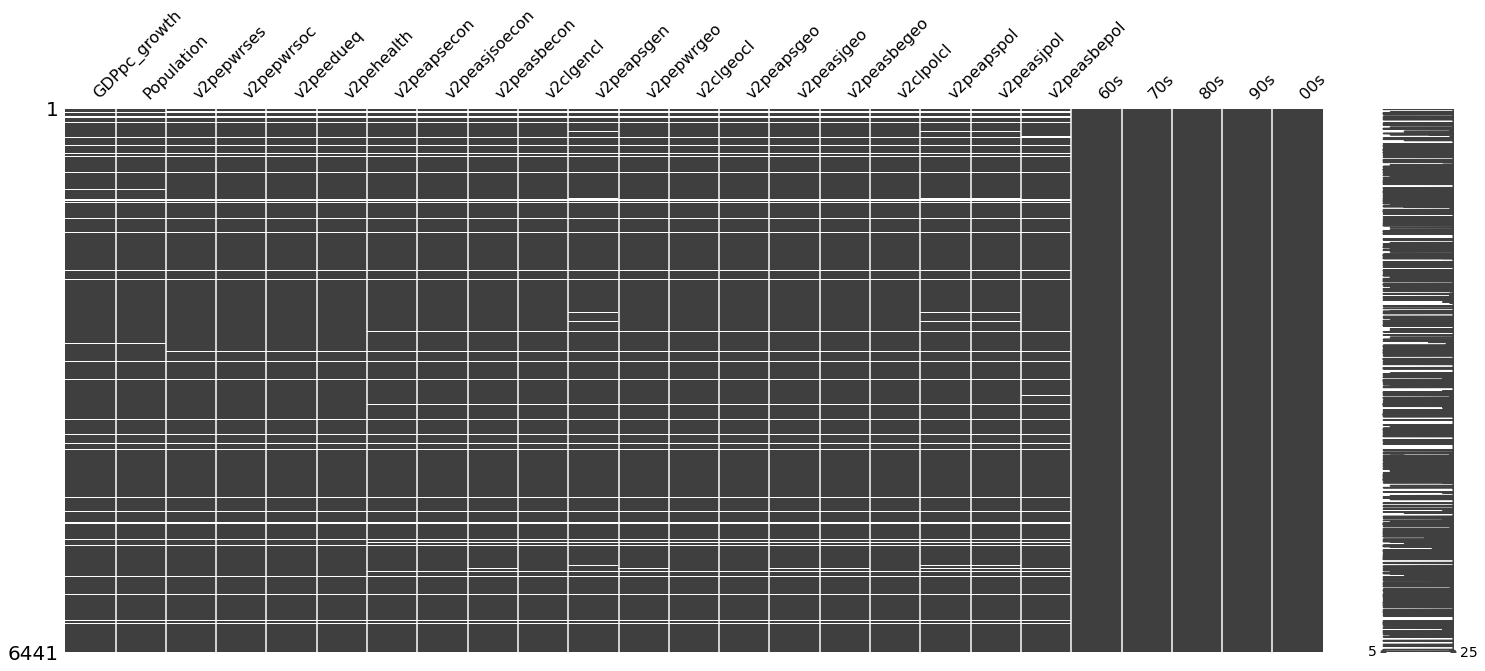

In [81]:
# missingness
miss.matrix(train_X)

In [82]:
train_X.isna().sum()

GDPpc_growth     422
Population       423
v2pepwrses       486
v2pepwrsoc       486
v2peedueq        486
v2pehealth       486
v2peapsecon      506
v2peasjsoecon    506
v2peasbecon      520
v2clgencl        506
v2peapsgen       547
v2pepwrgeo       524
v2clgeocl        506
v2peapsgeo       511
v2peasjgeo       520
v2peasbegeo      520
v2clpolcl        506
v2peapspol       556
v2peasjpol       561
v2peasbepol      536
60s                0
70s                0
80s                0
90s                0
00s                0
dtype: int64

In [83]:
train_X.dropna(inplace=True)

In [84]:
train_X.describe()

,GDPpc_growth,Population,v2pepwrses,v2pepwrsoc,v2peedueq,v2pehealth,v2peapsecon,v2peasjsoecon,v2peasbecon,v2clgencl,...,v2peasbegeo,v2clpolcl,v2peapspol,v2peasjpol,v2peasbepol,60s,70s,80s,90s,00s
count,5850.000000,5.850000e+03,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,...,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000
mean,1.897990,3.176184e+07,0.436820,0.445149,0.216548,0.259043,0.074032,0.336101,0.165426,0.564827,...,0.118561,0.327559,0.370931,0.258725,0.152099,0.076752,0.165470,0.177265,0.187521,0.204274
std,6.745237,1.126993e+08,1.173758,1.285071,1.475466,1.508872,1.397763,1.277610,1.322348,1.276089,...,1.306189,1.519870,1.381591,1.435734,1.437741,0.266221,0.371636,0.381925,0.390363,0.403204
min,-67.500000,7.984600e+04,-2.922000,-2.915000,-3.209000,-3.162000,-3.041000,-3.141000,-2.875000,-3.382000,...,-2.800000,-2.785000,-3.399000,-2.815000,-2.870000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.364000,2.934408e+06,-0.486000,-0.427000,-0.956750,-0.962000,-1.002000,-0.785000,-0.898500,-0.303250,...,-0.884000,-0.969000,-0.732000,-0.812000,-0.897000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.130000,7.640986e+06,0.603000,0.535000,0.080500,0.037000,-0.223000,0.430000,-0.075000,0.637500,...,-0.078000,0.305000,0.348000,0.036000,-0.152000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.490000,2.109643e+07,1.230750,1.452000,1.385000,1.401000,1.099750,1.232000,1.156000,1.447000,...,1.236000,1.524000,1.501000,1.352000,1.233250,0.000000,0.000000,0.000000,0.000000,0.000000
max,142.000000,1.357380e+09,3.048000,3.206000,3.594000,3.482000,3.535000,3.208000,3.621000,3.264000,...,2.754000,3.238000,2.947000,3.417000,3.580000,1.000000,1.000000,1.000000,1.000000,1.000000


## Make edits to full data

In [85]:
access_services.dropna(inplace = True)

## Split again

In [86]:
# split 
y = access_services.backsliding
X = access_services.drop(columns="backsliding")
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=202011)

## Model

In [87]:
# Build the modeling pipeline
pipe = Pipeline(steps=[('pre_process', preprocess),('sample', SMOTE), ('model',None)])

search_space = [
    
    # NaiveBayes
    {'model': [NB()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[5,10,25,50]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DT()],
     'model__max_depth':[2,3,4]},
    
    # Random forest with the N Estimators, max depth, and max features tuning param
    {'model' : [RF()],
    'model__max_depth':[7,8,9],
    'model__n_estimators':[500,1000,1500],
    'model__max_features': [5,10,15]},
    
    # SVC with 
    {'model' : [SVC()],
    'model__C' : [0.1, 1, 10, 100, 1000],
    'model__kernel' : ['linear', 'poly', 'rbf']},
    
]

# Grid Search to find the best parameters. The metric used for evaluation is balanced accuracy
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='balanced_accuracy',
                      n_jobs=4)

# fit the data with the model
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('sample',
                                        RandomOverSampler(random_state=12)),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [GaussianNB()]},
                         {'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [5, 10, 25, 50]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [2, 3, 4]},
                         {'model': [RandomForestClassifier()],
                          'model__max_depth': [7, 8, 9],
                          'model__max_features': [5, 10, 15],
                          'model__n_estimators': [500, 1000, 1500]},
                         {'model': [SVC(C=0.1)],
                          'model__C': [0.1, 1, 10, 1

In [88]:
#this is our out of sample AUC score
search.best_score_ 

0.6468608053925049

In [89]:
# what model performs the best
search.best_params_

{'model': SVC(C=0.1), 'model__C': 0.1, 'model__kernel': 'rbf'}

In [90]:
# now what happens if we try on the test data
best_mod = search.best_estimator_

In [91]:
pred_y = best_mod.predict(test_X)

In [92]:
confusion = m.confusion_matrix(test_y, pred_y)
print(confusion)
confusion_list.append(confusion)

[[1348  518]
 [  34   55]]


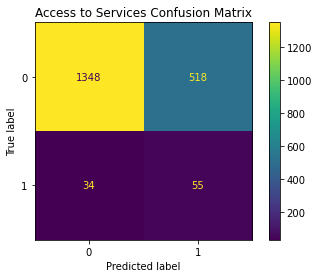

In [93]:
m.plot_confusion_matrix(best_mod, test_X, test_y)
plt.title("Access to Services Confusion Matrix")
plt.savefig("Figures/Access_Services_Confusion_matrix")

In [94]:
score = m.balanced_accuracy_score(test_y, pred_y)
print(score)
balanced_accuracy_score_list.append({"access to services":score})

0.6701891927694883


In [95]:
recall = m.recall_score(test_y, pred_y)
recall_score_list.append({"access to services":recall})

## Split the data for civil liberties

In [96]:
# split 
y = civil_liberties.backsliding
X = civil_liberties.drop(columns="backsliding")
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=202011)

## Explore the training data

<AxesSubplot:>

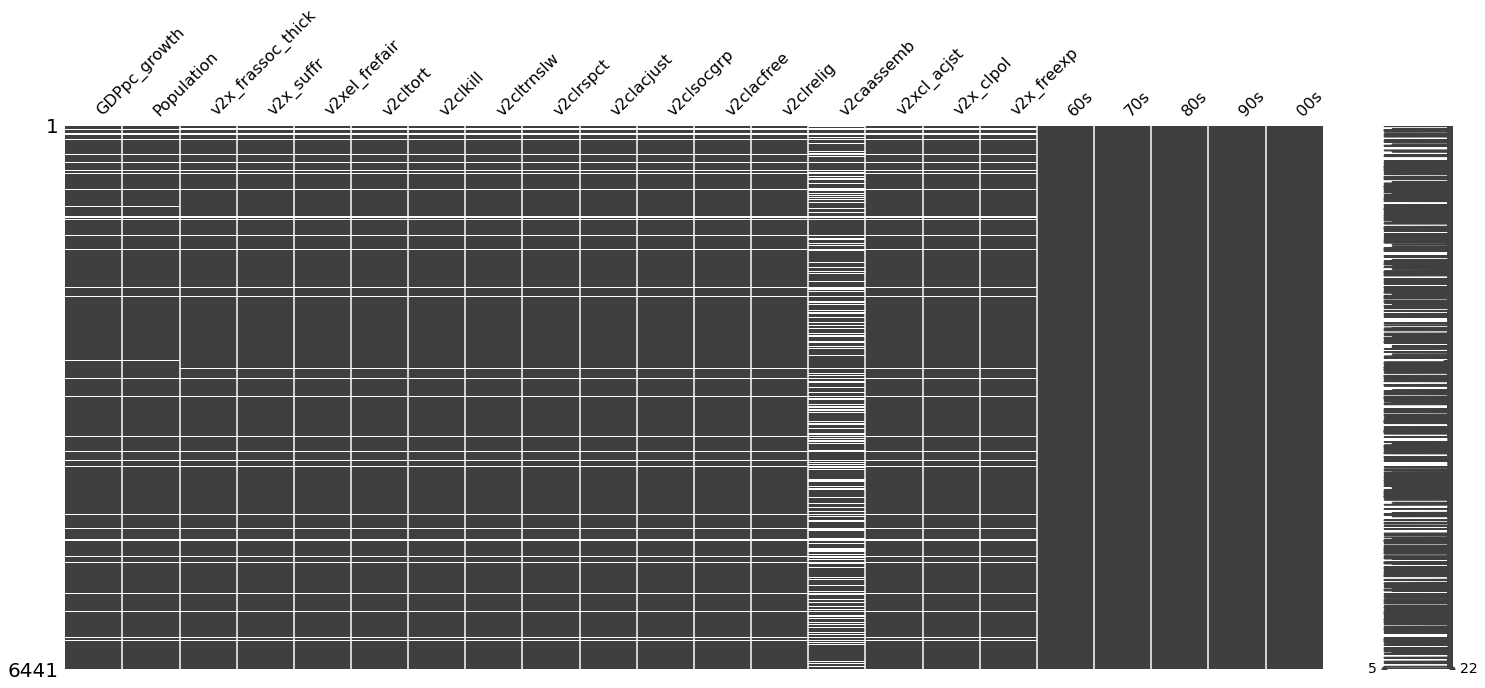

In [97]:
# missingness
miss.matrix(train_X)

In [98]:
train_X.isna().sum()

GDPpc_growth          422
Population            423
v2x_frassoc_thick     486
v2x_suffr             486
v2xel_frefair         486
v2cltort              486
v2clkill              486
v2cltrnslw            486
v2clrspct             486
v2clacjust            486
v2clsocgrp            486
v2clacfree            486
v2clrelig             486
v2caassemb           1917
v2xcl_acjst           486
v2x_clpol             486
v2x_freexp            486
60s                     0
70s                     0
80s                     0
90s                     0
00s                     0
dtype: int64

In [99]:
train_X.dropna(inplace=True)

In [100]:
train_X.describe()

,GDPpc_growth,Population,v2x_frassoc_thick,v2x_suffr,v2xel_frefair,v2cltort,v2clkill,v2cltrnslw,v2clrspct,v2clacjust,...,v2clrelig,v2caassemb,v2xcl_acjst,v2x_clpol,v2x_freexp,60s,70s,80s,90s,00s
count,4514.000000,4.514000e+03,4514.000000,4514.000000,4514.000000,4514.000000,4514.000000,4514.000000,4514.000000,4514.000000,...,4514.000000,4514.000000,4514.000000,4514.000000,4514.000000,4514.000000,4514.000000,4514.000000,4514.000000,4514.000000
mean,1.927866,3.556150e+07,0.510292,0.949443,0.444286,0.193783,0.433166,0.342340,0.079248,0.822150,...,0.495869,0.302270,0.554259,0.542293,0.534077,0.074214,0.159282,0.173239,0.188082,0.207133
std,6.517460,1.256956e+08,0.339558,0.197527,0.343748,1.624821,1.633881,1.459849,1.475484,1.215716,...,1.524875,1.590909,0.289502,0.334974,0.325506,0.262147,0.365980,0.378496,0.390821,0.405297
min,-61.600000,1.905680e+05,0.021000,0.000000,0.000000,-3.084000,-3.587000,-3.625000,-3.368000,-2.535000,...,-3.965000,-3.123000,0.005000,0.010000,0.011000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.286500,3.247124e+06,0.122000,1.000000,0.128000,-1.094000,-0.780000,-0.746000,-0.982000,0.145250,...,-0.565000,-1.008750,0.285000,0.195000,0.219000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.190000,8.207396e+06,0.578000,1.000000,0.400500,0.120000,0.446000,0.153000,-0.191000,0.943000,...,1.028000,0.337000,0.572000,0.575000,0.555000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.600000,2.383816e+07,0.858000,1.000000,0.787750,1.507250,1.925000,1.459000,0.997000,1.643000,...,1.726000,1.711250,0.805000,0.881000,0.854750,0.000000,0.000000,0.000000,0.000000,0.000000
max,142.000000,1.357380e+09,0.954000,1.000000,0.985000,3.294000,3.071000,3.471000,3.607000,3.209000,...,2.823000,3.061000,0.991000,0.983000,0.988000,1.000000,1.000000,1.000000,1.000000,1.000000


## Make edits to full data

In [101]:
civil_liberties.dropna(inplace=True)

## Split the data again

In [102]:
# split 
y = civil_liberties.backsliding
X = civil_liberties.drop(columns="backsliding")
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=202011)

## Model

In [103]:
# Build the modeling pipeline
pipe = Pipeline(steps=[('pre_process', preprocess), ('sample', SMOTE), ('model',None)])

search_space = [
    
    # NaiveBayes
    {'model': [NB()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[5,10,25,50]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DT()],
     'model__max_depth':[2,3,4]},
    
    # Random forest with the N Estimators, max depth, and max features tuning param
    {'model' : [RF()],
    'model__max_depth':[7,8,9],
    'model__n_estimators':[500,1000,1500],
    'model__max_features': [5,10,15]},
    
    # SVC with 
    {'model' : [SVC()],
    'model__C' : [0.1, 1, 10, 100, 1000],
    'model__kernel' : ['linear', 'poly', 'rbf']},
    
]

# Grid Search to find the best parameters. The metric used for evaluation is balanced accuracy
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='balanced_accuracy',
                      n_jobs=4)

# fit the data with the model
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('sample',
                                        RandomOverSampler(random_state=12)),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [GaussianNB()]},
                         {'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [5, 10, 25, 50]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [2, 3, 4]},
                         {'model': [RandomForestClassifier(max_depth=7,
                                                           max_features=15,
                                                           n_estimators=1500)],
                          'model__max_depth': [7, 8, 9],
                          'model__max_features': [5, 10, 15],
     

In [104]:
#this is our out of sample AUC score
search.best_score_ 

0.6582125560873975

In [105]:
# what model performs the best
search.best_params_

{'model': RandomForestClassifier(max_depth=7, max_features=15, n_estimators=1500),
 'model__max_depth': 7,
 'model__max_features': 15,
 'model__n_estimators': 1500}

In [106]:
# now what happens if we try on the test data
best_mod = search.best_estimator_

In [107]:
pred_y = best_mod.predict(test_X)

In [108]:
confusion = m.confusion_matrix(test_y, pred_y)
print(confusion)
confusion_list.append(confusion)

[[1065  363]
 [  39   47]]


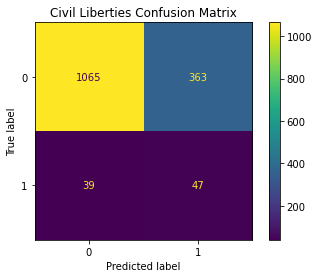

In [109]:
m.plot_confusion_matrix(best_mod, test_X, test_y)
plt.title("Civil Liberties Confusion Matrix")
plt.savefig("Figures/Civil_Liberties_Confusion_matrix")

In [110]:
score = m.balanced_accuracy_score(test_y, pred_y)
print(score)
balanced_accuracy_score_list.append({"Civil Liberties":score})

0.646154973617354


In [111]:
recall = m.recall_score(test_y, pred_y)
recall_score_list.append({"Civil Liberties":recall})

## Split the data for civil society

In [112]:
# split 
y = civil_society.backsliding
X = civil_society.drop(columns="backsliding")
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=202011)

## Explore the training data

<AxesSubplot:>

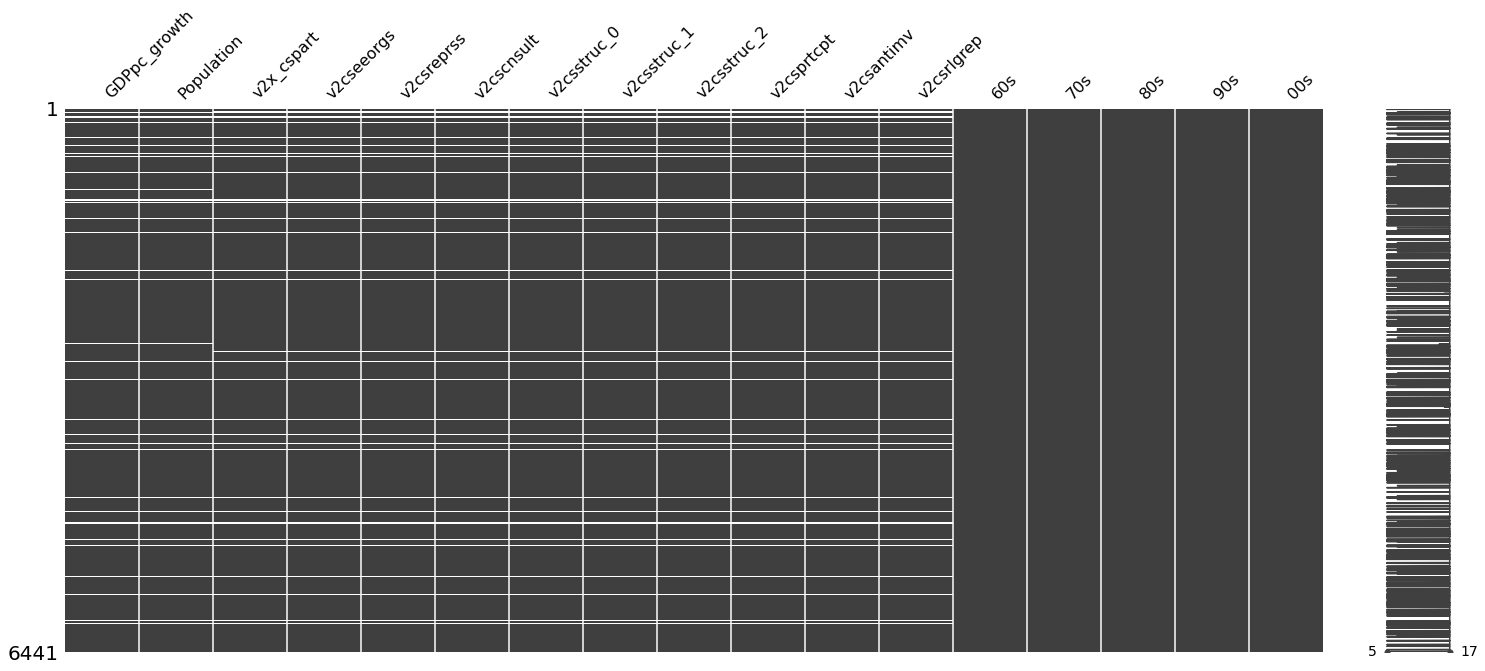

In [113]:
# missingness
miss.matrix(train_X)

In [114]:
train_X.isna().sum()

GDPpc_growth    422
Population      423
v2x_cspart      486
v2cseeorgs      486
v2csreprss      486
v2cscnsult      486
v2csstruc_0     486
v2csstruc_1     486
v2csstruc_2     486
v2csprtcpt      486
v2csantimv      486
v2csrlgrep      486
60s               0
70s               0
80s               0
90s               0
00s               0
dtype: int64

In [115]:
train_X.dropna(inplace=True)

In [116]:
train_X.describe()

,GDPpc_growth,Population,v2x_cspart,v2cseeorgs,v2csreprss,v2cscnsult,v2csstruc_0,v2csstruc_1,v2csstruc_2,v2csprtcpt,v2csantimv,v2csrlgrep,60s,70s,80s,90s,00s
count,5945.000000,5.945000e+03,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000
mean,1.884505,3.134500e+07,0.530105,0.334885,0.324796,0.197554,0.199085,0.296159,0.426154,0.171092,-0.464415,0.459391,0.077376,0.167031,0.178301,0.187553,0.203028
std,6.752730,1.118436e+08,0.288850,1.575861,1.586836,1.460498,0.287394,0.239231,0.272051,1.500182,1.292466,1.448172,0.267210,0.373035,0.382798,0.390387,0.402287
min,-67.500000,7.984600e+04,0.016000,-3.230000,-3.599000,-2.444000,0.000000,0.000000,0.000000,-3.209000,-2.989000,-4.152000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.392000,2.947314e+06,0.269000,-0.949000,-0.871000,-0.970000,0.000000,0.125000,0.200000,-0.823000,-1.386000,-0.543000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.110000,7.549433e+06,0.540000,0.382000,0.270000,0.142000,0.000000,0.250000,0.400000,0.410000,-0.617000,0.694000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.490000,2.065796e+07,0.795000,1.764000,1.663000,1.237000,0.333000,0.417000,0.600000,1.304000,0.515000,1.818000,0.000000,0.000000,0.000000,0.000000,0.000000
max,142.000000,1.357380e+09,0.986000,3.607000,3.210000,3.386000,1.000000,1.000000,1.000000,2.920000,4.016000,2.617000,1.000000,1.000000,1.000000,1.000000,1.000000


## Make edits to full data

In [117]:
civil_society.dropna(inplace = True)

## Split again

In [118]:
# split 
y = civil_society.backsliding
X = civil_society.drop(columns="backsliding")
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=202011)

## Model

In [119]:
# Build the modeling pipeline
pipe = Pipeline(steps=[('pre_process', preprocess),('sample', SMOTE), ('model',None)])

search_space = [
    
    # NaiveBayes
    {'model': [NB()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[5,10,25,50]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DT()],
     'model__max_depth':[2,3,4]},
    
    # Random forest with the N Estimators, max depth, and max features tuning param
    {'model' : [RF()],
    'model__max_depth':[7,8,9],
    'model__n_estimators':[500,1000,1500],
    'model__max_features': [5,10,15]},
    
    # SVC with 
    {'model' : [SVC()],
    'model__C' : [0.1, 1, 10, 100, 1000],
    'model__kernel' : ['linear', 'poly', 'rbf']},
    
]

# Grid Search to find the best parameters. The metric used for evaluation is ROC AUC
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='balanced_accuracy',
                      n_jobs=4)

# fit the data with the model
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('sample',
                                        RandomOverSampler(random_state=12)),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [GaussianNB()]},
                         {'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [5, 10, 25, 50]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [2, 3, 4]},
                         {'model': [RandomForestClassifier()],
                          'model__max_depth': [7, 8, 9],
                          'model__max_features': [5, 10, 15],
                          'model__n_estimators': [500, 1000, 1500]},
                         {'model': [SVC(C=0.1, kernel='poly')],
                          'model__C':

In [120]:
#this is our out of sample AUC score
search.best_score_ 

0.6422411328610416

In [121]:
# what model performs the best
search.best_params_

{'model': SVC(C=0.1, kernel='poly'), 'model__C': 0.1, 'model__kernel': 'poly'}

In [122]:
# now what happens if we try on the test data
best_mod = search.best_estimator_

In [123]:
pred_y = best_mod.predict(test_X)

In [124]:
confusion = m.confusion_matrix(test_y, pred_y)
print(confusion)
confusion_list.append(confusion)

[[1305  591]
 [  35   55]]


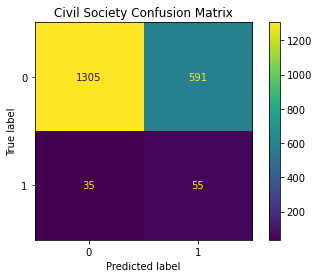

In [125]:
m.plot_confusion_matrix(best_mod, test_X, test_y)
plt.title("Civil Society Confusion Matrix")
plt.savefig("Figures/Civil_Society_Confusion_matrix")

In [126]:
score = m.balanced_accuracy_score(test_y, pred_y)
print(score)
balanced_accuracy_score_list.append({"Civil Society":score})

0.6497011251758087


In [127]:
recall = m.recall_score(test_y, pred_y)
recall_score_list.append({"Civil Society":recall})

## Split the data for media

In [128]:
# split 
y = media.backsliding
X = media.drop(columns="backsliding")
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=202011)

## Explore Training Data

<AxesSubplot:>

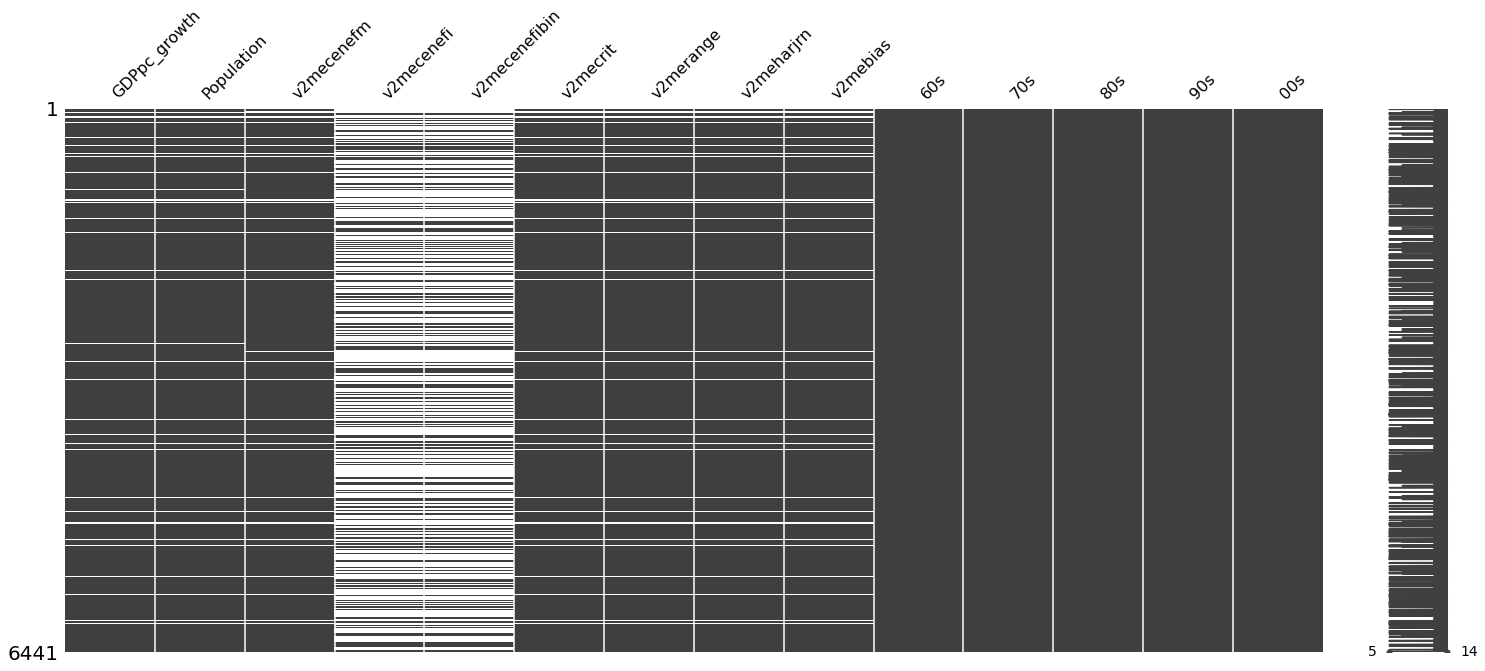

In [129]:
# missingness
miss.matrix(train_X)

In [130]:
train_X.isna().sum()

GDPpc_growth      422
Population        423
v2mecenefm        486
v2mecenefi       4013
v2mecenefibin    4013
v2mecrit          486
v2merange         486
v2meharjrn        486
v2mebias          486
60s                 0
70s                 0
80s                 0
90s                 0
00s                 0
dtype: int64

In [131]:
train_X.dropna(inplace=True)

In [132]:
train_X.describe()

,GDPpc_growth,Population,v2mecenefm,v2mecenefi,v2mecenefibin,v2mecrit,v2merange,v2meharjrn,v2mebias,60s,70s,80s,90s,00s
count,2419.000000,2.419000e+03,2419.000000,2419.000000,2419.000000,2419.000000,2419.000000,2419.000000,2419.000000,2419.000000,2419.000000,2419.000000,2419.000000,2419.000000
mean,2.397114,3.688705e+07,0.703496,0.309396,-0.003222,0.893872,0.857318,0.673432,0.837415,0.002894,0.007028,0.006201,0.061182,0.465482
std,5.563438,1.305213e+08,1.460447,1.379146,1.084541,1.382835,1.369108,1.375794,1.380184,0.053727,0.083554,0.078518,0.239714,0.498910
min,-61.600000,3.660530e+05,-2.773000,-4.205000,-5.054000,-3.015000,-2.887000,-3.181000,-3.283000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.373500,3.600130e+06,-0.380000,-0.540000,0.409500,0.128500,0.157000,-0.189000,0.193000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.480000,8.925743e+06,0.778000,0.791000,0.450000,1.154000,1.248000,0.693000,1.160000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.710000,2.548548e+07,1.838000,1.514000,0.469000,2.060000,1.884000,1.720000,1.852000,0.000000,0.000000,0.000000,0.000000,1.000000
max,92.600000,1.357380e+09,3.327000,1.846000,0.549000,3.036000,2.714000,3.917000,2.861000,1.000000,1.000000,1.000000,1.000000,1.000000


## Edit Full Data

In [133]:
media.dropna(inplace=True)

## Split again

In [134]:
# split 
y = media.backsliding
X = media.drop(columns="backsliding")
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=202011)

## Model

In [135]:
# Build the modeling pipeline
pipe = Pipeline(steps=[('pre_process', preprocess),('sample', SMOTE), ('model',None)])

search_space = [
    
    # NaiveBayes
    {'model': [NB()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[5,10,25,50]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DT()],
     'model__max_depth':[2,3,4]},
    
    # Random forest with the N Estimators, max depth, and max features tuning param
    {'model' : [RF()],
    'model__max_depth':[7,8,9],
    'model__n_estimators':[500,1000,1500],
    'model__max_features': [5,10,15]},
    
    # SVC with 
    {'model' : [SVC()],
    'model__C' : [0.1, 1, 10, 100, 1000],
    'model__kernel' : ['linear', 'poly', 'rbf']},
    
]

# Grid Search to find the best parameters. The metric used for evaluation is ROC AUC
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='balanced_accuracy',
                      n_jobs=4)

# fit the data with the model
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('sample',
                                        RandomOverSampler(random_state=12)),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [GaussianNB()]},
                         {'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [5, 10, 25, 50]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [2, 3, 4]},
                         {'model': [RandomForestClassifier()],
                          'model__max_depth': [7, 8, 9],
                          'model__max_features': [5, 10, 15],
                          'model__n_estimators': [500, 1000, 1500]},
                         {'model': [SVC(C=1, kernel='poly')],
                          'model__C': [

In [136]:
#this is our out of sample AUC score
search.best_score_ 

0.7019260445346246

In [137]:
# what model performs the best
search.best_params_

{'model': SVC(C=1, kernel='poly'), 'model__C': 1, 'model__kernel': 'poly'}

In [138]:
# now what happens if we try on the test data
best_mod = search.best_estimator_

In [139]:
pred_y = best_mod.predict(test_X)

In [140]:
confusion = m.confusion_matrix(test_y, pred_y)
print(confusion)
confusion_list.append(confusion)

[[486 295]
 [  9  19]]


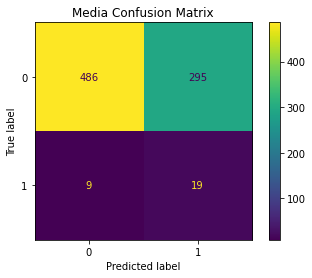

In [141]:
m.plot_confusion_matrix(best_mod, test_X, test_y)
plt.title("Media Confusion Matrix")
plt.savefig("Figures/Media_Confusion_matrix")

In [142]:
score = m.balanced_accuracy_score(test_y, pred_y)
print(score)
balanced_accuracy_score_list.append({"Media":score})

0.6504252789464058


In [143]:
recall = m.recall_score(test_y, pred_y)
recall_score_list.append({"Media":recall})

## Split Full VDems

In [144]:
y = vdem.backsliding
X = vdem.drop(columns="backsliding")
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=202011)

## Explore Training Data

<AxesSubplot:>

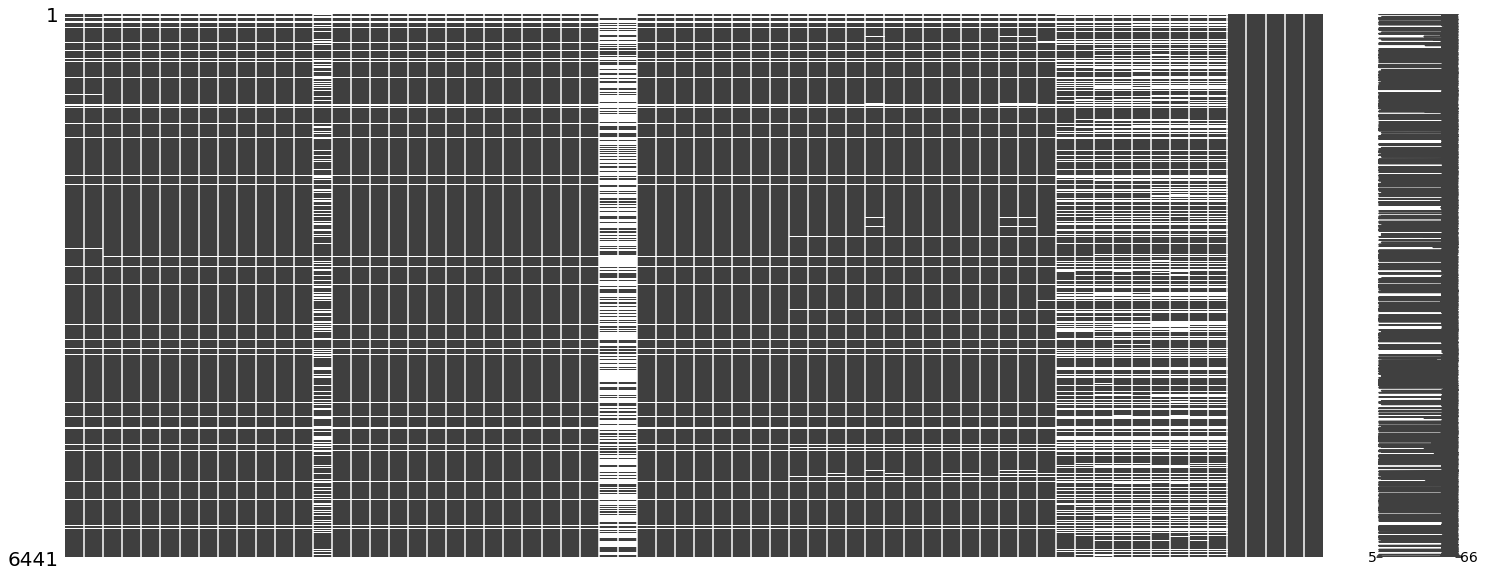

In [145]:
# missingness
miss.matrix(train_X)

In [146]:
train_X.isna().sum()

GDPpc_growth         422
Population           423
v2x_frassoc_thick    486
v2x_suffr            486
v2xel_frefair        486
                    ... 
60s                    0
70s                    0
80s                    0
90s                    0
00s                    0
Length: 66, dtype: int64

In [147]:
train_X.dropna(inplace=True)

In [148]:
train_X.describe()

,GDPpc_growth,Population,v2x_frassoc_thick,v2x_suffr,v2xel_frefair,v2cltort,v2clkill,v2cltrnslw,v2clrspct,v2clacjust,...,v2caautmob,v2castate,v2catrauni,v2capolit,v2canonpol,60s,70s,80s,90s,00s
count,1711.000000,1.711000e+03,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,...,1711.000000,1711.00000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000
mean,2.510310,4.396724e+07,0.657939,0.976731,0.552517,0.683923,0.998884,0.730743,0.332942,1.106314,...,-0.589274,-0.26866,0.625487,0.752791,0.760917,0.004091,0.009936,0.008767,0.059614,0.449445
std,5.529104,1.517502e+08,0.289096,0.142373,0.328935,1.523357,1.476258,1.352853,1.471024,1.082577,...,1.244907,1.41715,1.270882,1.108799,1.008944,0.063850,0.099211,0.093247,0.236840,0.497583
min,-61.600000,3.660530e+05,0.023000,0.000000,0.000000,-2.821000,-2.928000,-2.681000,-3.112000,-2.479000,...,-2.172000,-2.97900,-2.802000,-2.548000,-2.894000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.438000,4.054322e+06,0.488000,1.000000,0.253000,-0.470500,-0.161000,-0.248000,-0.772000,0.582000,...,-1.628000,-1.42800,-0.023000,0.192000,0.103000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.540000,9.721454e+06,0.797000,1.000000,0.580000,0.836000,1.218000,0.716000,0.016000,1.237000,...,-0.922000,-0.52500,0.871000,0.798000,0.793000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.885000,3.071404e+07,0.886000,1.000000,0.887000,1.937000,2.279000,1.787500,1.477000,1.811000,...,0.332000,1.06800,1.378000,1.409500,1.421000,0.000000,0.000000,0.000000,0.000000,1.000000
max,92.600000,1.357380e+09,0.954000,1.000000,0.985000,3.229000,3.071000,3.471000,3.607000,3.209000,...,3.047000,3.13300,3.430000,3.448000,3.641000,1.000000,1.000000,1.000000,1.000000,1.000000


## Edit Full Data

In [149]:
vdem.dropna(inplace=True)

## Split again

In [150]:
# split 
y = vdem.backsliding
X = vdem.drop(columns="backsliding")
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=202011)

## Model

In [151]:
# Build the modeling pipeline
pipe = Pipeline(steps=[('pre_process', preprocess),('sample', SMOTE), ('model',None)])

search_space = [
    
    # NaiveBayes
    {'model': [NB()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[5,10,25,50]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DT()],
     'model__max_depth':[2,3,4]},
    
    # Random forest with the N Estimators, max depth, and max features tuning param
    {'model' : [RF()],
    'model__max_depth':[7,8,9],
    'model__n_estimators':[500,1000,1500],
    'model__max_features': [5,10,15]},
    
    # SVC with 
    {'model' : [SVC()],
    'model__C' : [0.1, 1, 10, 100, 1000],
    'model__kernel' : ['linear', 'poly', 'rbf']},
    
]

# Grid Search to find the best parameters. The metric used for evaluation is ROC AUC
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='balanced_accuracy',
                      n_jobs=4)

# fit the data with the model
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('sample',
                                        RandomOverSampler(random_state=12)),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [GaussianNB()]},
                         {'model': [KNeighborsClassifier(n_neighbors=50)],
                          'model__n_neighbors': [5, 10, 25, 50]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [2, 3, 4]},
                         {'model': [RandomForestClassifier()],
                          'model__max_depth': [7, 8, 9],
                          'model__max_features': [5, 10, 15],
                          'model__n_estimators': [500, 1000, 1500]},
                         {'model': [SVC()], 'model__C': [0.1, 1, 10, 100, 1000],
      

In [152]:
#this is our out of sample AUC score
search.best_score_ 

0.7265736646637967

In [153]:
# what model performs the best
search.best_params_

{'model': KNeighborsClassifier(n_neighbors=50), 'model__n_neighbors': 50}

In [154]:
# now what happens if we try on the test data
best_mod = search.best_estimator_

In [155]:
pred_y = best_mod.predict(test_X)
m.roc_auc_score(test_y, pred_y)

0.7498352320873741

In [156]:
confusion = m.confusion_matrix(test_y, pred_y)
print(confusion)
confusion_list.append(confusion)

[[397 162]
 [  4  15]]


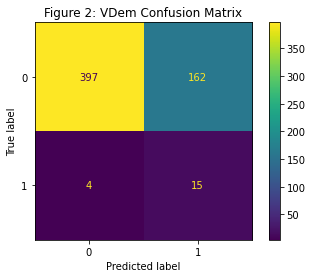

In [157]:
m.plot_confusion_matrix(best_mod, test_X, test_y)
plt.title("Figure 2: VDem Confusion Matrix")
plt.savefig("Figures/Vdem_Confusion_matrix")

In [158]:
score = m.balanced_accuracy_score(test_y, pred_y)
print(score)
balanced_accuracy_score_list.append({"Vdem":score})

0.749835232087374


In [159]:
recall = m.recall_score(test_y, pred_y)
recall_score_list.append({"Vdem":recall})

## Variable Importance for the Full Model

In [160]:
# Use variable permutation to derive the importance of each variable
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [161]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)

# view the top 10 most predictive variables in the dataframe
vi_dat = vi_dat[0:10]
vi_dat

,variable,vi,std,low,high
0,v2x_freexp,0.013056,0.002797,7.462175e-03,0.018650
1,v2pepwrsoc,0.010630,0.002821,4.988305e-03,0.016271
2,v2mecenefm,0.008781,0.003925,9.311206e-04,0.016631
3,v2caviol,0.008203,0.003317,1.570098e-03,0.014837
4,v2x_clpol,0.007626,0.002568,2.489634e-03,0.012762
5,v2peasjsoecon,0.007626,0.003044,1.538098e-03,0.013713
6,v2mecenefibin,0.007279,0.001244,4.790218e-03,0.009768
7,v2catrauni,0.006817,0.002462,1.893177e-03,0.011741
8,v2peedueq,0.006008,0.002086,1.835824e-03,0.010180
9,v2mebias,0.005546,0.002773,2.688821e-17,0.011092


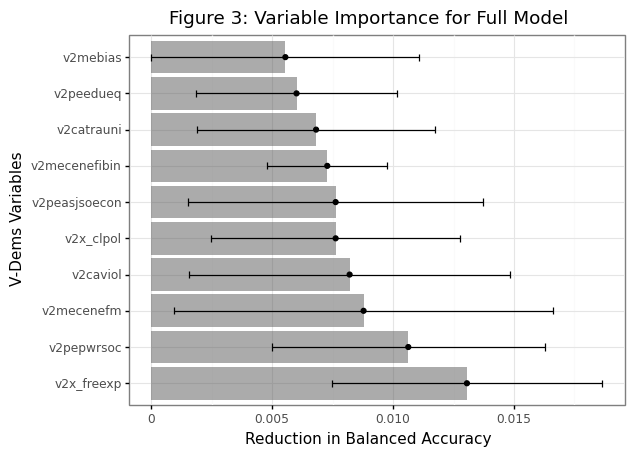

<ggplot: (8771331462087)>

In [162]:
# Plot variable importance
vdem_importance = (
    ggplot(vi_dat,
          aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in Balanced Accuracy",x="V-Dems Variables",title="Figure 3: Variable Importance for Full Model")
)
vdem_importance.save("Figures/vdem_importance")
vdem_importance

## Plot list of scores

In [163]:
# print the balanced accuracy score
print(balanced_accuracy_score_list)

[{'strife': 0.6927536231884058}, {'access to services': 0.6701891927694883}, {'Civil Liberties': 0.646154973617354}, {'Civil Society': 0.6497011251758087}, {'Media': 0.6504252789464058}, {'Vdem': 0.749835232087374}]


In [164]:
# save into a single dictionary
balanced_accuracy_score_dict = {}
for d in balanced_accuracy_score_list:
    balanced_accuracy_score_dict.update(d)

balanced_accuracy_score_dict

{'strife': 0.6927536231884058,
 'access to services': 0.6701891927694883,
 'Civil Liberties': 0.646154973617354,
 'Civil Society': 0.6497011251758087,
 'Media': 0.6504252789464058,
 'Vdem': 0.749835232087374}

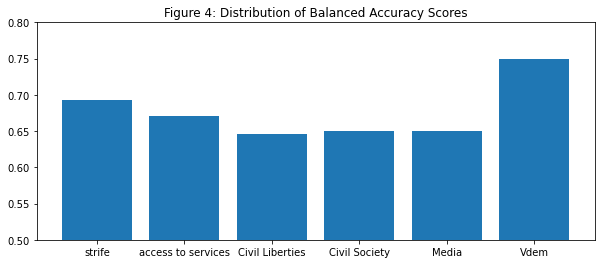

In [165]:
# plot the balanced accuracy scores
keys = balanced_accuracy_score_dict.keys()
values = balanced_accuracy_score_dict.values()

plt.bar(keys, values)
plt.ylim(0.5,0.8)
plt.title("Figure 4: Distribution of Balanced Accuracy Scores")
figure= plt.gcf()
figure.set_size_inches(10, 4)
#plt.xticks(rotation=90)
plt.savefig("Figures/Acc_Dist", bbox_inches='tight')

In [166]:
# print recall scores
print(recall_score_list)

[{'strife': 0.6811594202898551}, {'access to services': 0.6179775280898876}, {'Civil Liberties': 0.5465116279069767}, {'Civil Society': 0.6111111111111112}, {'Media': 0.6785714285714286}, {'Vdem': 0.7894736842105263}]


In [167]:
# save into dictionary
recall_score_dict = {}
for d in recall_score_list:
    recall_score_dict.update(d)

recall_score_dict

{'strife': 0.6811594202898551,
 'access to services': 0.6179775280898876,
 'Civil Liberties': 0.5465116279069767,
 'Civil Society': 0.6111111111111112,
 'Media': 0.6785714285714286,
 'Vdem': 0.7894736842105263}

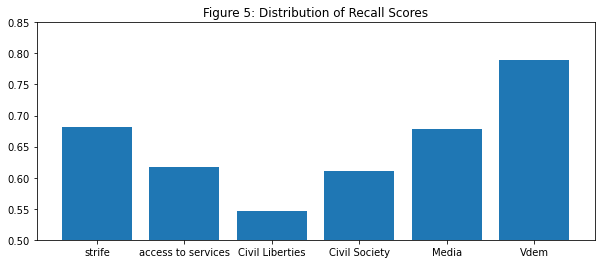

In [168]:
# plot recall scores
keys = recall_score_dict.keys()
values = recall_score_dict.values()

plt.bar(keys, values)
plt.ylim(0.5,0.85)
plt.title("Figure 5: Distribution of Recall Scores")
figure= plt.gcf()
figure.set_size_inches(10, 4)
#plt.xticks(rotation=90)
plt.savefig("Figures/Recall_Dist", bbox_inches='tight')